<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Packages</a></span></li></ul></div>

## Importing Packages

- model interpetation 
- coeffs on time lags

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



import warnings
warnings.filterwarnings("ignore")

In [2]:
# #CREATE FUNCTION THAT READS IN CSV AND AND CLEANS DATA
# def data_reader_cleaner(df):
# # 1) read in csv
# data = pd.read_csv('./data/data_1.csv')
# # 2) reset_index
# data.reset_index(inplace=True)
# # 3)set colunms as row 0 
# data.columns = data.iloc[0]
# # 4) drop first and last columns
# data.drop([0,31], axis = 0, inplace = True)
# # 5) set index as date
#  data.set_index('Date', inplace = True)   
# 6) concats
# return df

In [3]:
data = pd.read_csv('./data/data_1.csv')

In [4]:
data_2 = pd.read_csv('./data/data_2.csv')

In [5]:
data_3 = pd.read_csv('./data/data_3.csv')

In [6]:
data_4 = pd.read_csv('./data/data_4.csv')

In [7]:
data_5 = pd.read_csv('./data/data_5.csv')

In [8]:
data.reset_index(inplace=True)

In [9]:
data_2.reset_index(inplace=True)

In [10]:
data_3.reset_index(inplace=True)

In [11]:
data_4.reset_index(inplace=True)

In [12]:
data_5.reset_index(inplace=True)

In [13]:
data.columns = data.iloc[0]

In [14]:
data_2.columns = data_2.iloc[0]

In [15]:
data_3.columns = data_3.iloc[0]

In [16]:
data_4.columns = data_4.iloc[0]

In [17]:
data_5.columns = data_5.iloc[0]

In [18]:
data_2.columns

Index(['Date', 'Day of the Week', 'Bill Count', 'Voids', 'Gross Sales',
       'Discounts', 'Net Sales', 'Menu Item Cost', 'Labor Cost', 'Margin'],
      dtype='object', name=0)

In [19]:
data.shape

(32, 10)

In [20]:
data_2.shape

(185, 10)

In [21]:
data_3.shape

(183, 10)

In [22]:
data_4.shape

(182, 10)

In [23]:
data_5.shape

(49, 10)

In [24]:
data.drop([0,31], axis = 0, inplace = True)

In [25]:
data_2.drop([0,184], axis = 0, inplace = True)

In [26]:
data_3.drop([0,182], axis = 0, inplace = True)

In [27]:
data_4.drop([0,181], axis = 0, inplace = True)

In [28]:
data_5.drop([0,48], axis = 0, inplace = True)

In [29]:
data.set_index('Date', inplace = True)

In [30]:
data_2.set_index('Date', inplace = True)

In [31]:
data_3.set_index('Date', inplace = True)

In [32]:
data_4.set_index('Date', inplace = True)

In [33]:
data_5.set_index('Date', inplace = True)

In [34]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


In [35]:
data.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,30,30,30,30,30,30,30,30,30
unique,7,26,27,30,18,30,1,30,30
top,Friday,103,$144.00,"$6,165.00",$0.00,"$4,657.50",$0.00,$751.85,"$4,911.79"
freq,5,3,2,1,13,1,30,1,1


In [36]:
data_2.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,183,183,183,183,183,183,183,183,183
unique,7,88,135,182,103,179,38,182,182
top,Sunday,82,$86.00,"$3,555.00",$0.00,"$6,029.00",$0.00,"$1,136.97","$3,048.28"
freq,27,8,5,2,70,3,86,2,2


In [37]:
data_2.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [38]:
data.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [39]:
data_3.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [40]:
data_4.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [41]:
data_5.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [42]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


In [43]:
merge=pd.concat([data,data_2,data_3,data_4,data_5])

In [44]:
merge.dtypes

0
Day of the Week    object
Bill Count         object
Voids              object
Gross Sales        object
Discounts          object
Net Sales          object
Menu Item Cost     object
Labor Cost         object
Margin             object
dtype: object

In [45]:
t = ["Voids", "Gross Sales", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin"]


In [46]:
merge[t] = merge[t].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [47]:
merge["Bill Count"] = merge["Bill Count"].astype(int)

In [48]:
merge

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-06-01,Friday,103,144.0,6432.02,0.00,6432.02,0.0,918.64,5513.38
2018-06-02,Saturday,142,478.0,7812.00,0.00,7812.00,0.0,1539.21,6272.79
2018-06-03,Sunday,110,185.0,5772.00,52.75,5719.25,0.0,1249.21,4470.04
2018-06-04,Monday,108,28.0,5085.00,0.00,5085.00,0.0,1252.86,3832.14
2018-06-05,Tuesday,68,134.0,4568.00,18.00,4550.00,0.0,842.49,3707.51
...,...,...,...,...,...,...,...,...,...
2020-02-12,Wednesday,75,0.0,4043.00,42.00,4001.00,124.0,1341.20,2535.80
2020-02-13,Thursday,81,50.0,4754.50,0.00,4754.50,36.0,1654.26,3064.24
2020-02-14,Friday,162,93.0,10207.01,11.50,10195.51,350.0,2271.43,7574.08


In [49]:
merge = pd.concat([merge, pd.get_dummies(merge['Day of the Week'])], axis=1)

In [50]:
merge.drop('Day of the Week', axis = 1, inplace = True)

In [51]:
merge.sort_index(inplace = True)

In [52]:
x_cols = ["Voids", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin", "Bill Count",
         "Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

In [53]:

# X_train, X_test, y_train, y_test = train_test_split(merge[x_cols],
#                                                    merge['Gross Sales'],
#                                                     shuffle = False)

In [54]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [55]:
merge['Gross Sales'].mean()

4563.761674718196

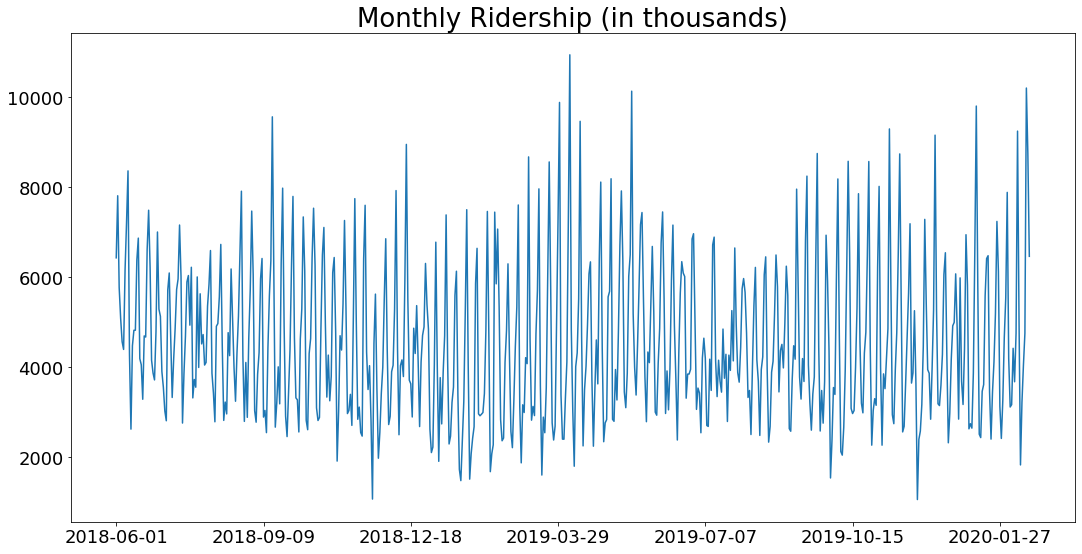

In [56]:
plot_series(merge, ['Gross Sales'], title = "Monthly Ridership (in thousands)", steps= 100)

In [57]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.
adfuller(merge['Gross Sales'])

(-4.413893331869137,
 0.0002804708497872855,
 14,
 606,
 {'1%': -3.4411869900487906,
  '5%': -2.866321181236609,
  '10%': -2.569316262893616},
 9994.277564875969)

In [58]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [59]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(merge['Gross Sales']))

Test Statistic   -4.413893
p-value           0.000280
dtype: float64

In [60]:
merge.index = pd.DatetimeIndex(merge.index).to_period('d')

In [61]:
merge.shape

(621, 15)

In [62]:
621 *.35

217.35

In [63]:
X_test_exo = merge.iloc[:232,:]

In [64]:
merge.tail()

,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,,
2020-02-12,75,0.0,4043.00,42.0,4001.00,124.0,1341.20,2535.80,0,0,0,0,0,0,1
2020-02-13,81,50.0,4754.50,0.0,4754.50,36.0,1654.26,3064.24,0,0,0,0,1,0,0
2020-02-14,162,93.0,10207.01,11.5,10195.51,350.0,2271.43,7574.08,1,0,0,0,0,0,0
2020-02-15,135,146.0,8752.00,0.0,8752.00,94.0,2348.01,6309.99,0,0,1,0,0,0,0
2020-02-16,113,148.0,6465.00,19.8,6445.20,370.0,2278.74,3796.46,0,0,0,1,0,0,0


In [65]:
X_test_exo.shape

(232, 15)

In [66]:
X_train_exo = merge.iloc[:404:]

In [67]:
X_train = X_train_exo.drop("Gross Sales", axis = 1)

In [68]:
X_test = X_test_exo.drop("Gross Sales", axis = 1)

In [69]:

y_train = X_train_exo['Gross Sales']

In [70]:
X_test.shape

(232, 14)

In [71]:
y_test = X_test_exo['Gross Sales']

In [72]:
y_train

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-07-06    4645.00
2019-07-07    4198.00
2019-07-08    2704.00
2019-07-09    2683.00
2019-07-10    4178.00
Freq: D, Name: Gross Sales, Length: 404, dtype: float64

In [73]:
X_test.shape

(232, 14)

In [74]:
X_train.tail()

,Bill Count,Voids,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,
2019-07-06,87,34.0,22.0,4623.0,48.0,1257.62,3317.38,0,0,1,0,0,0,0
2019-07-07,90,110.0,9.0,4189.0,0.0,1148.75,3040.25,0,0,0,1,0,0,0
2019-07-08,54,0.0,54.5,2649.5,0.0,912.43,1737.07,0,1,0,0,0,0,0
2019-07-09,59,11.0,63.5,2619.5,228.0,688.60,1702.90,0,0,0,0,0,1,0
2019-07-10,88,93.0,31.5,4146.5,96.0,1043.75,3006.75,0,0,0,0,0,0,1


In [75]:
import itertools

In [76]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [77]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7989.702069938601
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7463.397401631959
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7274.642726553804
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6860.0793481772325
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7260.1466576418225
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7091.125153149966
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7017.342987578313
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6766.319566697615
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7747.191675860482
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7446.007105501198
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7127.405912019112
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6648.291104601561
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7454.961710114107
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6901.881473996436
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6890.455762075684
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6644.501807498554
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7178.999621659536
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6924.191953280626
ARIMA(0,

In [78]:
sarima = SARIMAX(endog = y_train,
                 order = (0, 2, 1),              # (p, d, q)
                 seasonal_order = (0, 1, 2, 4),  # (P, D, Q, S)
                 exog = X_train) 

# Fit SARIMA model.
model = sarima.fit()



In [79]:
X_test.head()

,Bill Count,Voids,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,
2018-06-01,103,144.0,0.00,6432.02,0.0,918.64,5513.38,1,0,0,0,0,0,0
2018-06-02,142,478.0,0.00,7812.00,0.0,1539.21,6272.79,0,0,1,0,0,0,0
2018-06-03,110,185.0,52.75,5719.25,0.0,1249.21,4470.04,0,0,0,1,0,0,0
2018-06-04,108,28.0,0.00,5085.00,0.0,1252.86,3832.14,0,1,0,0,0,0,0
2018-06-05,68,134.0,18.00,4550.00,0.0,842.49,3707.51,0,0,0,0,0,1,0


In [80]:
X_test.tail()

,Bill Count,Voids,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,
2019-01-15,51,95.0,0.0,2467.0,306.0,1162.90,998.10,0,0,0,0,0,1,0
2019-01-16,48,40.0,0.0,3217.0,48.0,734.65,2434.35,0,0,0,0,0,0,1
2019-01-17,70,32.0,0.0,3559.0,242.0,1092.19,2224.81,0,0,0,0,1,0,0
2019-01-18,99,6.0,0.0,5602.0,178.0,1189.36,4234.64,1,0,0,0,0,0,0
2019-01-19,127,110.0,0.0,6134.0,118.0,1434.65,4581.35,0,0,1,0,0,0,0


In [81]:
# # # Generate predictions based on test set.
preds = model.predict(start=datetime(2018,6,5),
                    end=datetime(2019,1,18),
                     exog=X_test)

In [82]:
preds.index

PeriodIndex(['2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
             '2018-06-13', '2018-06-14',
             ...
             '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
             '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
             '2019-01-17', '2019-01-18'],
            dtype='period[D]', name='Date', length=227, freq='D')

In [83]:
y_train.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
             '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
             '2019-07-09', '2019-07-10'],
            dtype='period[D]', name='Date', length=404, freq='D')

In [84]:
X_test.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
             '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
             '2019-01-18', '2019-01-19'],
            dtype='period[D]', name='Date', length=232, freq='D')

In [85]:
# preds = model.forecast(steps = len(X_test))[0]
# future_forecast = pd.DataFrame(preds, index = X_test.index, columns = ["predictions"])

In [86]:
#pred = pd.DataFrame(preds)

In [87]:
X_test.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
             '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
             '2019-01-18', '2019-01-19'],
            dtype='period[D]', name='Date', length=232, freq='D')

In [88]:
y_train.index.isnull().sum()

0

In [89]:
preds.index.isnull().sum()

0

In [90]:
y_train.head()

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
Freq: D, Name: Gross Sales, dtype: float64

In [91]:
y_test.index.to_timestamp()

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10',
               ...
               '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-19'],
              dtype='datetime64[ns]', name='Date', length=232, freq=None)

In [92]:
y_test

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-01-15    2467.00
2019-01-16    3217.00
2019-01-17    3559.00
2019-01-18    5602.00
2019-01-19    6134.00
Freq: D, Name: Gross Sales, Length: 232, dtype: float64

In [93]:
y_test.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
             '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
             '2019-01-18', '2019-01-19'],
            dtype='period[D]', name='Date', length=232, freq='D')

In [94]:
y_test.index = y_test.index.to_timestamp()

In [95]:
y_train.index = y_train.index.to_timestamp()

In [96]:
preds.index = preds.index.to_timestamp()

In [97]:
# future_forecast = model.predict(n_periods=400)

In [98]:
# future_forecast.index =future_forecast.index.to_timestamp()

In [99]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(pd.DataFrame(y_test).dropna(), preds[2:]) ** 0.5

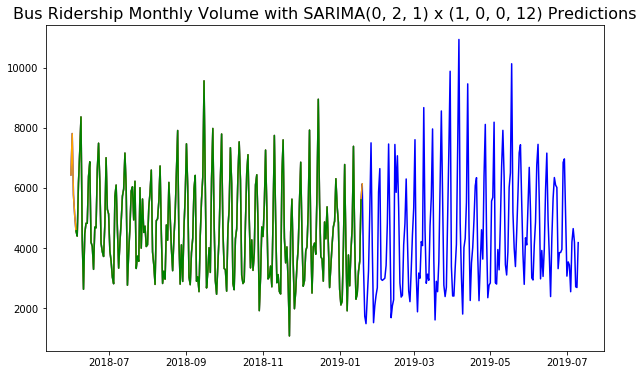

In [100]:
# #a Fit a SARIMA(0, 2, 1) x (1, 0, 0, 12) model.

# sarima = SARIMAX(endog = y_train.astype(float),
#                  order = (0, 2, 1),              # (p, d, q)
#                  seasonal_order = (1, 0, 0,2)) # (P, D, Q, S)

# # Fit SARIMA model.
# model = sarima.fit()

# Generate predictions based on test set.
# preds = model.predict(start=datetime(2020,3,1),
#                       end=datetime(2020,1,10))

# # # Evaluate predictions.
# print(mean_squared_error(y_test, preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
# plt.plot(future_forecast, color = 'black')

plt.title(label = 'Bus Ridership Monthly Volume with SARIMA(0, 2, 1) x (1, 0, 0, 12) Predictions', fontsize=16)
plt.show();